# **Analyze Semantic Change (COHA)**
## **Goal**: Use trained `Word2vec` embeddings to examine semantic change over time.

### **Imports**

In [3]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from ngramprep.common.w2v_model import W2VModel
from ngramprep.ngram_analyze.cosine_similarity_time_series import cosine_similarity_over_years, plot_nearest_neighbors
from ngramprep.ngram_analyze.weat_time_series import compute_weat_over_years
from ngramprep.ngram_analyze.semantic_drift import track_yearly_drift, compute_similarity_to_previous_year
from ngramprep.ngram_analyze.average_relatedness_by_year import track_word_semantic_drift

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The `ngram-kit` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory. We'll also set a `corpus_path` variable pointing to the yearly corpus data.

In [4]:
corpus_name = 'COHA'
genre_focus = ['fic']
db_path_stub = f'/scratch/edk202/NLP_corpora/{corpus_name}/'

model_path = '/scratch/edk202/NLP_models/COHA/models_final/norm_and_align'

### `compare_words_cosim` method

Let's say we want to measure the relationship between three pairs of words — _horse_ and _donkey_, _horse_ and _lizard_ , and _horse_ and _amoeba_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `compare_words_cosim` method for our words.

In [7]:
year = 1990
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs100_w010_mc001_sg1_e010.kv')

word1, word2 = 'cat', 'lion'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'cat', 'bear'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'cat', 'fish'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'cat', 'atom'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

cos(Φ) of 'cat' and 'lion' in 1990 = 0.4212
cos(Φ) of 'cat' and 'bear' in 1990 = 0.2951
cos(Φ) of 'cat' and 'fish' in 1990 = 0.2621
cos(Φ) of 'cat' and 'atom' in 1990 = -0.0973


The results are about what you'd expect!

### `compare_models_cosim` method
Suppose we want to compare the semantic similarity of the _same_ words across _models_. We can use the `compare_models_cosim` method to compute the average cosine similarity between shared words in two models. Or, if we specify the `word` parameter, we can compute similarity for a single word across the models.

In [8]:
model = W2VModel(f'{model_path}/w2v_y1900_wbnone_vs100_w010_mc001_sg1_e010.kv')
reference_model = W2VModel(f'{model_path}/w2v_y2000_wbnone_vs100_w010_mc001_sg1_e010.kv')

cosim_mean, cosim_sd, shared_words = model.compare_models_cosim(reference_model)
print(f"Overall similarity between models:\n  cos(Φ) mean = {cosim_mean:.4f}\n  cos(Φ) SD = {cosim_sd:.4f}\n  shared words: {shared_words}\n")

word = 'horse'
cosim, _, _ = model.compare_models_cosim(reference_model, word)
print(f"Similarity of \'{word}\' between models:\n  cos(Φ) = {cosim:.4f}\n")

Overall similarity between models:
  cos(Φ) mean = 0.5676
  cos(Φ) SD = 0.1232
  shared words: 18013

Similarity of 'horse' between models:
  cos(Φ) = 0.7989



### `track_yearly_drift` function

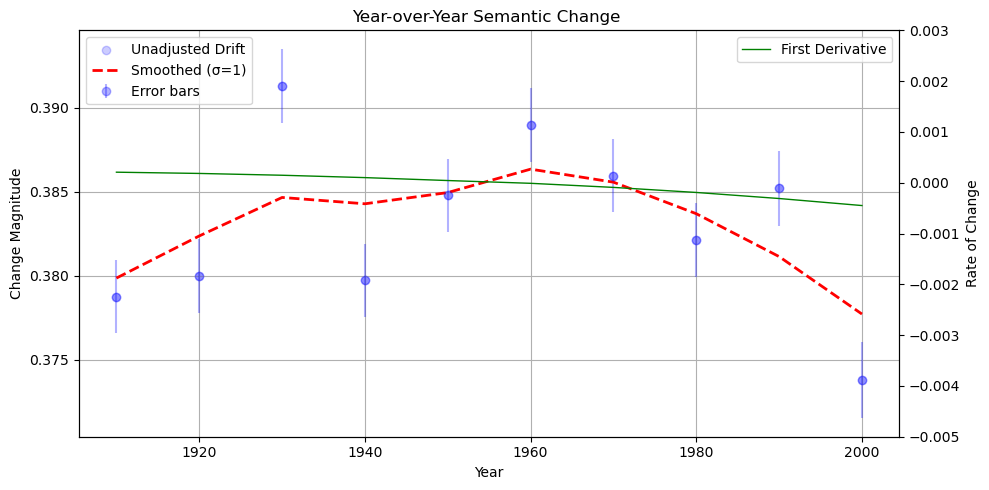

In [9]:
drift_scores = track_yearly_drift(
    start_year=1900,
    end_year=2000,
    year_step=10,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=1,
    confidence=0.99
)

### `mean_cosine_similarity_to_all` class

In [10]:
model = W2VModel(f'{model_path}/w2v_y1900_wbnone_vs100_w010_mc001_sg1_e010.kv')

mean_sim = model.mean_cosine_similarity_to_all('person', '')
print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.2531


Tracking semantic drift for word: 'human' (Excluding: 0 words)


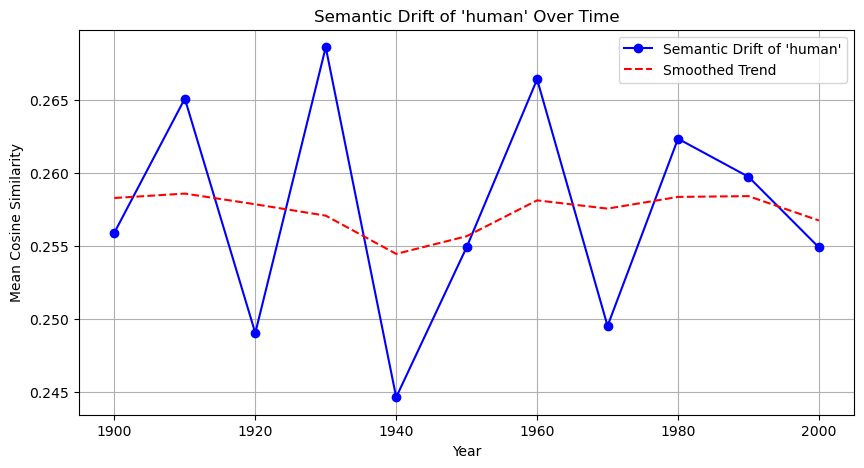

{1900: (0.2559189475845083, 0),
 1910: (0.26508704237810415, 0),
 1920: (0.24905547908608153, 0),
 1930: (0.26860187658186124, 0),
 1940: (0.24466002154180116, 0),
 1950: (0.2549235603206908, 0),
 1960: (0.2664042590919865, 0),
 1970: (0.24953116797176408, 0),
 1980: (0.2623431401546659, 0),
 1990: (0.2597381923565953, 0),
 2000: (0.2549062333247512, 0)}

In [11]:
track_word_semantic_drift(
    word='human',
    start_year=1900,
    end_year=2000,
    year_step=10,
    model_dir=f'{model_path}',
    plot=1,
    smooth=True,
    sigma=1
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

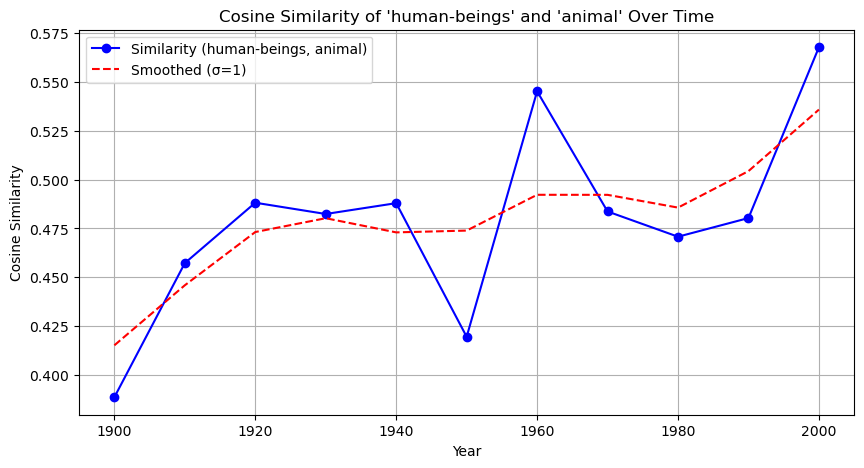

{1900: 0.3886363,
 1910: 0.4572566,
 1920: 0.48814034,
 1930: 0.48237443,
 1940: 0.48791695,
 1950: 0.4195608,
 1960: 0.5451306,
 1970: 0.48366022,
 1980: 0.47075242,
 1990: 0.4802984,
 2000: 0.56768996}

In [12]:
cosine_similarity_over_years(
    word1='human-beings',
    word2='animal',
    start_year=1900,
    end_year=2000,
    year_step=10,
    model_dir=f'{model_path}',
    plot=1,
    smooth=True,
    sigma=1
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [13]:
model = W2VModel(f'{model_path}/w2v_y2000_wbnone_vs100_w010_mc001_sg1_e010.kv')

target1 = ["poor", "poverty"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy"]
attribute2 = ["unhappy", "miserable"]

weat_score, p = model.compute_weat(
    target1,
    target2,
    attribute1,
    attribute2,
    num_permutations=1_000
)

print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

WEAT effect size (Cohen's d) = -1.6823, p = 0.8210


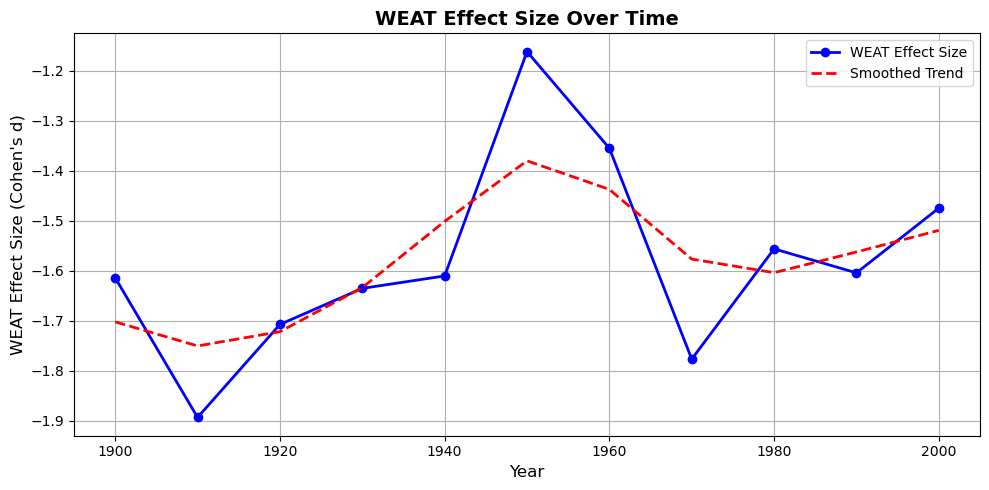

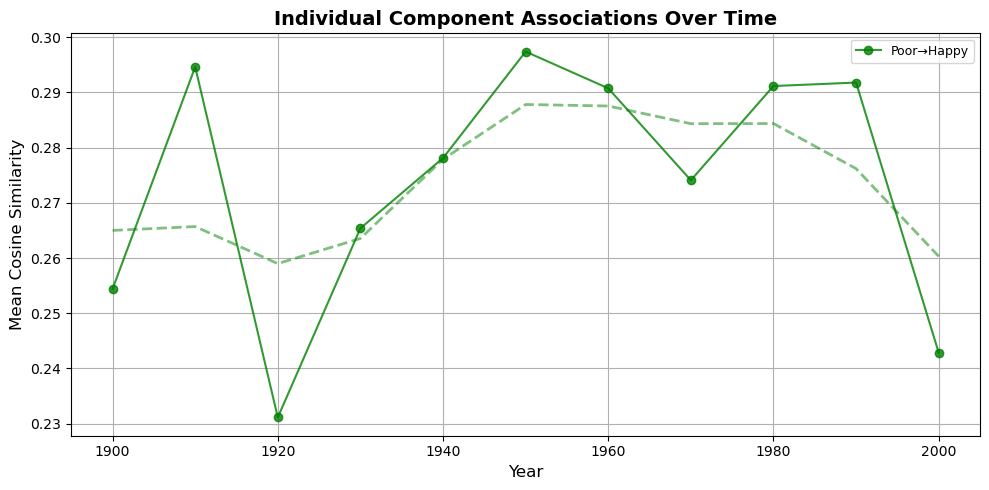

{1900: (-1.6136651,
  None,
  None,
  {'Poor→Happy': 0.25440606,
   'Poor→Unhappy': 0.37325257,
   'Rich→Happy': 0.21627307,
   'Rich→Unhappy': 0.17585382}),
 1910: (-1.8929108,
  None,
  None,
  {'Poor→Happy': 0.29462966,
   'Poor→Unhappy': 0.41740996,
   'Rich→Happy': 0.21198936,
   'Rich→Unhappy': 0.19184321}),
 1920: (-1.7069757,
  None,
  None,
  {'Poor→Happy': 0.23112659,
   'Poor→Unhappy': 0.33580196,
   'Rich→Happy': 0.317041,
   'Rich→Unhappy': 0.2844363}),
 1930: (-1.6348009,
  None,
  None,
  {'Poor→Happy': 0.26539132,
   'Poor→Unhappy': 0.32951623,
   'Rich→Happy': 0.2834065,
   'Rich→Unhappy': 0.19886884}),
 1940: (-1.6099583,
  None,
  None,
  {'Poor→Happy': 0.2781183,
   'Poor→Unhappy': 0.35615233,
   'Rich→Happy': 0.26055655,
   'Rich→Unhappy': 0.21352094}),
 1950: (-1.1613761,
  None,
  None,
  {'Poor→Happy': 0.29738972,
   'Poor→Unhappy': 0.37265423,
   'Rich→Happy': 0.24274948,
   'Rich→Unhappy': 0.26229504}),
 1960: (-1.3546431,
  None,
  None,
  {'Poor→Happy': 0.29

In [14]:
target1 = {'Poor': ['poor', 'penniless', 'needy', 'destitute']}
target2 = {'Rich': ['wealthy', 'affluent']}
attribute1 = {'Happy': ['happy', 'glad', 'joy', 'carefree', 'gladness', 'joyous', 'happiness']}
attribute2 = {'Unhappy': ['unhappy', 'miserable', 'heartbroken', 'unhappiness', 'hopeless', 'sorrow', 'misery']}

compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2000,
    year_step=10,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=1,
    return_std=False,
    return_associations=True,
    plot_associations=['Poor→Happy']
)

### `plot_nearest_neighbors` function

This function plots the N nearest neighbors to a target word for a specific year, showing their cosine similarity scores in a horizontal bar chart.

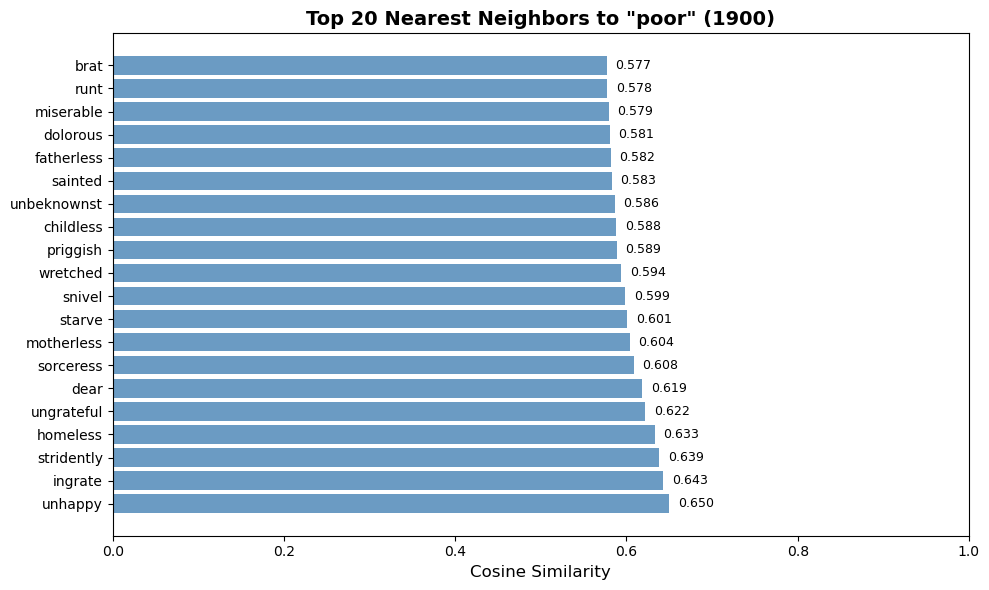


Nearest neighbors:
  unhappy: 0.6502
  ingrate: 0.6428
  stridently: 0.6385
  homeless: 0.6333
  ungrateful: 0.6218
  dear: 0.6186
  sorceress: 0.6083
  motherless: 0.6037
  starve: 0.6009
  snivel: 0.5985
  wretched: 0.5942
  priggish: 0.5890
  childless: 0.5881
  unbeknownst: 0.5865
  sainted: 0.5825
  fatherless: 0.5819
  dolorous: 0.5806
  miserable: 0.5792
  runt: 0.5778
  brat: 0.5768


In [15]:
neighbors = plot_nearest_neighbors(
    word='poor',
    year=1900,
    model_dir=model_path,
    n=20
)

print("\nNearest neighbors:")
for word, similarity in neighbors:
    print(f"  {word}: {similarity:.4f}")